Title: Computational Fluid Dynamics 02: Body-fitted grids without for loops
Date: 2017-05-06 08:30
Category: ComputationalFluidDynamics
Tags: Python, grid generation
Slug: cfd-02-body-fitted-grid-genereation-python
Cover: /p5102/img5102/output_7_0.png
Authors: Peter Schuhmacher
Summary: Vectorized Python code to generate basic rectangular grids

### Python code for a terrain-following grid

In this example the terrain-followin property is executed in the y-direction. The x-coordinate is determined as in the rectangular case in the previous example. At each x-grid point the y-coordinate is computed as 

$$
y = y_{bottom} + \eta \cdot (y_{top} - y_{bottom}) = y_{bottom} + \eta \cdot dY
$$

where $\eta$ varies between 0..1. In the following code `iy` has the role of $\eta$ . Again the outer product completes the grid efficiently.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mclr

def scale01(z):   #--- transform z to [0 ..1]
    return (z-np.min(z))/(np.max(z)-np.min(z))

def scale11(z):   #--- transform z to [-1 ..1]
    return 2.0*(scale01(z)-0.5)

#### plt.pcolormesh()

plt.pcolormesh() has changed its functionality. The dimension of the value parameter (z) must be of lower dimension than the dimesions of the corners (x,y). So we intruduce the helper function redu()-

In [3]:
def redu(A): return A[0:-1,0:-1]

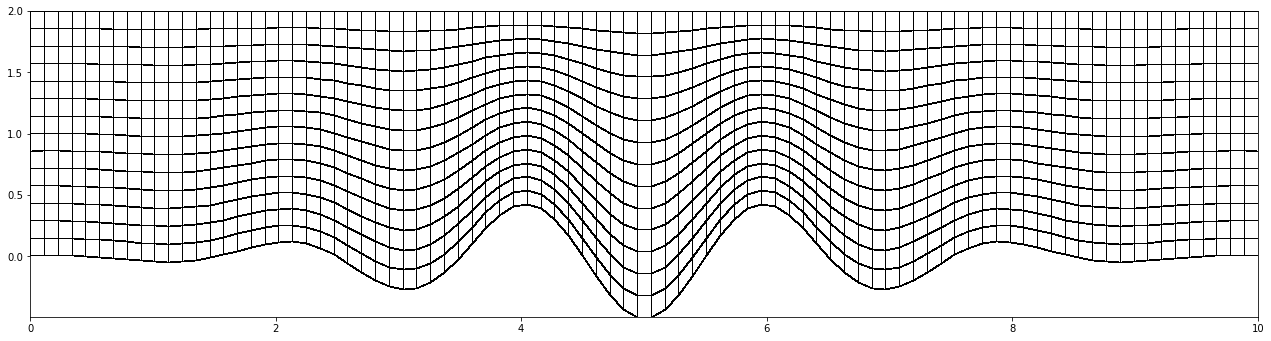

In [9]:
import numpy as np

nx, ny = 90, 15
Lx, Ly = 10, 2
ix = np.linspace(0,nx-1,nx)/(nx-1)
iy = np.linspace(0,ny-1,ny)/(ny-1)

#--- set some fancy south boundary ----
A = 0.5; B = 1.0; C = 5.0; D = 0.25
south_boundary = B*np.exp(-(scale11(ix)/A)**2) * D*np.cos(scale01(ix)*C*2.0*np.pi)
north_boundary = np.ones_like(south_boundary)
dY =  north_boundary - south_boundary

#--- generate the GRID: use the outer product to complete the 2D x-/y-coord
x = np.outer(ix,np.ones_like(iy))
y = np.outer(dY,iy) + np.outer(south_boundary,np.ones_like(iy))

#---- grafics ------------------------------------------------
#--- scale for the graphics ---------------
X=x*Lx;  Y=y*Ly

#--- graphical display
fig = plt.figure(figsize=(22,22)) 
myCmap = mclr.ListedColormap(['white','white'])
ax4 = fig.add_subplot(111)
z = redu(np.zeros_like(X))
ax4.pcolormesh(X, Y, z, edgecolors='k', lw=0.75, cmap=myCmap)
ax4.set_aspect('equal')
plt.show()

#### Have some fun

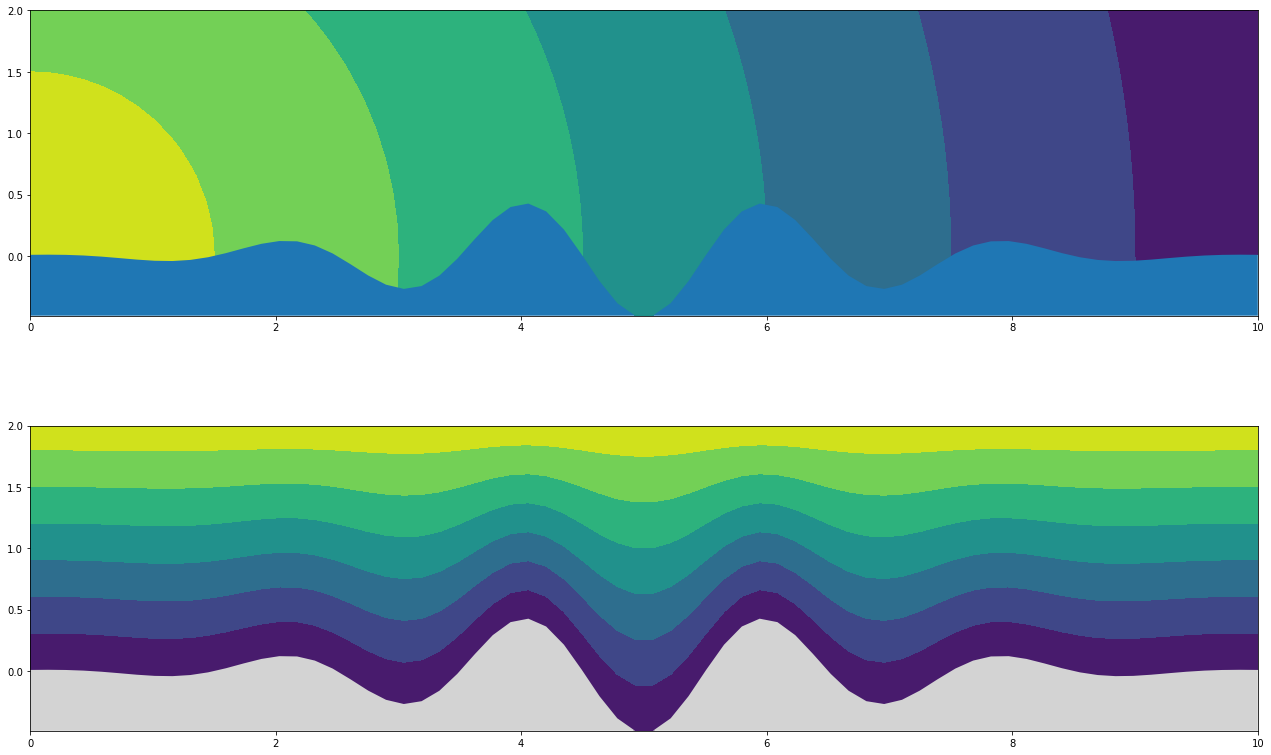

In [8]:
#--- set some fancy Z-values ---------
Z1 = (np.sqrt(X*X + Y*Y))
Z2 = (np.outer(np.ones_like(dY),iy))
Z3 = (Y)

#---- experiment with the graphics --------
fig = plt.figure(figsize=(22,14)) 
ax1 = fig.add_subplot(211)
ax1.contourf(X, Y, -Z1)
ax1.fill_between(ix*Lx, south_boundary*Ly, min(south_boundary)*Ly)
ax1.set_aspect('equal')

ax1 = fig.add_subplot(212)
ax1.contourf(X, Y, Z2)
#ax1.pcolormesh(X, Y, Z2, edgecolors='w',cmap="plasma")
ax1.fill_between(ix*Lx, south_boundary*Ly, min(south_boundary)*Ly,facecolor='lightgrey')
ax1.set_aspect('equal')
plt.show()


$$ $$

## Python code for a terrain-following polar grid

1. `ix` has the role of the angle $\phi$
2. `ix` is transformed to `sx` so that the grid points will be concentrated in the middle of the $\phi$-domain
3. `iy` has the role of the radius $r$
4. `iy` is transformed to `sy` so that the grid points will be concentrated at the lower boundary of the $r$-domain
5. (x,y) is the grid in polar coordinates ($\phi, r$)
6. (x,y) is transformed to the cartesian coordinates (X,Y)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mclr

nx = 38; ny = 18
ix = np.linspace(0,nx-1,nx)/(nx-1)
iy = np.linspace(0,ny-1,ny)/(ny-1)

#---- stretching in x- = angular-direction ---------
ixx =  np.linspace(0,nx-2,nx-1)/(nx-2)
dxmin = 0.1;                                # minimal distance as control parameter
dxx = 1.0-np.sin(ixx*np.pi) + dxmin         # model the distances
sx = np.array([0])                          # set the starting point
sx = scale01(np.cumsum(np.append(sx,dxx)))  # append the distances and sum up

#---- stretching in y- = radial-direction ---------
yStretch = 0.5; yOffset = 2.95                    # control parameters
sy = scale01(np.exp((yStretch*(yOffset+iy))**2)); # exp-stretching

#---- complete as polar coordinates --------------
tx = np.pi * sx            # use ix as angel phi
ty =   1.0 + sy            # use iy as radius r [1.0 .. 2.0]

x = np.outer(tx,np.ones_like(ty))  
y = np.outer(np.ones_like(tx),ty)  

#---- transform to cartesian coordinates ---------
X = y * np.cos(x) # transform to cartesian x-coord
Y = y * np.sin(x) # transform to cartesian y-coord


#### The graphical display

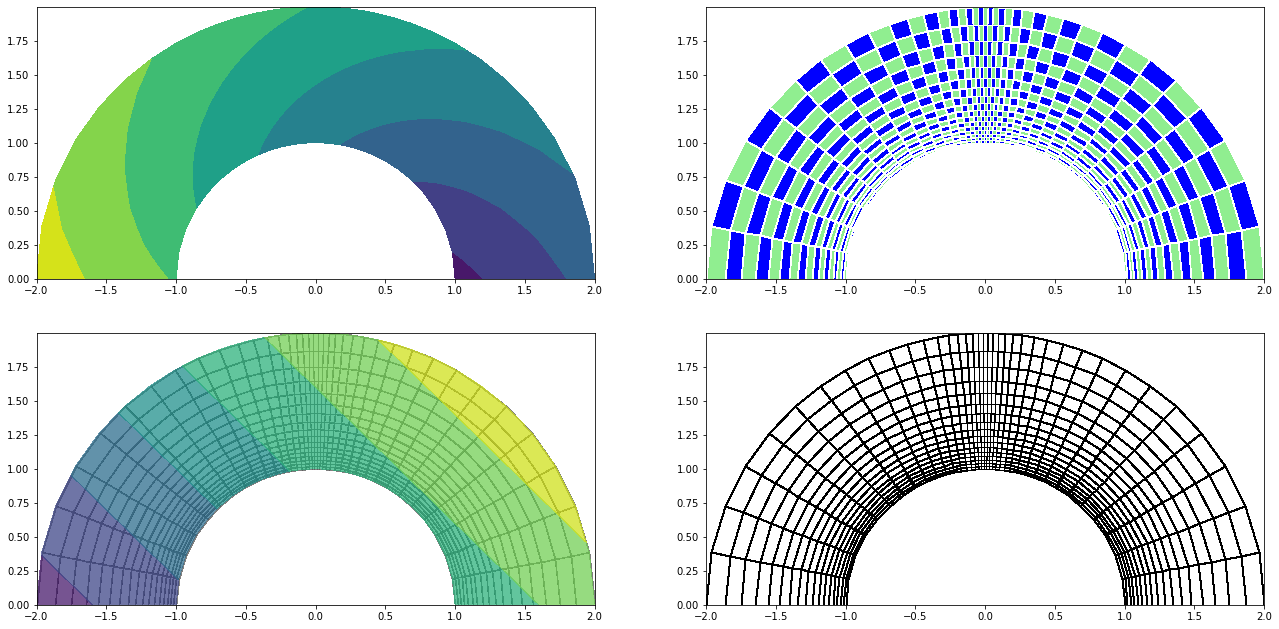

In [11]:
#---- grafics---------------------------------------------
fig = plt.figure(figsize=(22,11)) 
ax1 = fig.add_subplot(221)
ax1.contourf(X, Y, x + y)

ax2 = fig.add_subplot(222)
c1, c2 = np.meshgrid(iy*(ny-1),ix*(nx-1))
myCmap = mclr.ListedColormap(['blue','lightgreen'])
z2 = redu((-1)**(c1+c2))
ax2.pcolormesh(X, Y, z2, edgecolors='w', lw=0.75, cmap=myCmap)

myCmap = mclr.ListedColormap(['white','white'])
ax3 = fig.add_subplot(223)
z3 = redu( np.zeros_like(X))
ax3.pcolormesh(X, Y, z3, edgecolors='k', lw=0.5, cmap=myCmap, alpha=0.5)
ax3.contourf(X, Y, X+Y, alpha=0.75)

ax4 = fig.add_subplot(224)
ax4.pcolormesh(X, Y, redu(0*X), edgecolors='k', lw=1, cmap=myCmap)
plt.show()